


Hey guys, continue where this code is left off. This is a group assignment, the only this that will matter is the final output.


Keep the data csv in one place, either outside the content folder or in the content folder

In [ ]:
import numpy as np
import pandas as pd
import spacy
import en_core_web_sm
import re
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import sparse
from tqdm import tqdm

In [ ]:
df = pd.read_csv("/content/data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [ ]:
df.shape

(461, 17)

In [ ]:
df.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

In [ ]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [ ]:
df = df.dropna()


In [ ]:
df.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          0
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

In [ ]:
for i in tqdm(range(0,df.shape[0])):
  df['fpl_sel'].iloc[i] = float(str(df['fpl_sel'].iloc[i]).rstrip('%'))

  0%|          | 0/460 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
100%|██████████| 460/460 [00:00<00:00, 5719.10it/s]


In [ ]:
df.describe() #data seems scewed

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.00000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,26.815217,2.182609,11.024022,765.315217,5.446739,57.43913,1.993478,0.034783,3.208696,10.339130,0.304348,0.145652
std,3.959846,0.999631,12.268045,932.233794,1.347915,53.10415,0.957689,0.183428,1.279949,5.731672,0.460632,0.353141
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.00000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.750000,4.500000,5.00000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.00000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,900.000000,5.500000,94.00000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.00000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


In [ ]:
df.corr()['market_value'].sort_values()

position_cat   -0.219174
age            -0.133828
age_cat        -0.118746
club_id        -0.046486
new_foreign     0.097896
region          0.101659
new_signing     0.130970
big_club        0.593249
fpl_points      0.615013
page_views      0.739540
fpl_value       0.789373
market_value    1.000000
Name: market_value, dtype: float64

In [ ]:
df

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,2.0,France,0,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,0.4,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,0.2,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,0.3,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,5.9,16,1.0,England,0,1,20,0,1


In [ ]:
df.corr()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
age,1.000000,0.218241,-0.133828,-0.050802,-0.096749,0.185467,0.086430,-0.126108,0.972208,-0.003952,-0.125569,-0.080422
position_cat,0.218241,1.000000,-0.219174,-0.281990,-0.491582,-0.087700,-0.062474,0.000930,0.194915,-0.017677,0.016251,-0.106367
market_value,-0.133828,-0.219174,1.000000,0.739540,0.789373,0.615013,0.101659,0.097896,-0.118746,-0.046486,0.593249,0.130970
page_views,-0.050802,-0.281990,0.739540,1.000000,0.731912,0.541706,0.031055,-0.050072,-0.043301,-0.093159,0.502444,0.126671
fpl_value,-0.096749,-0.491582,0.789373,0.731912,1.000000,0.620702,0.082429,0.108843,-0.081307,-0.060542,0.424425,0.098718
fpl_points,0.185467,-0.087700,0.615013,0.541706,0.620702,1.000000,-0.006712,-0.205551,0.174747,0.040194,0.278997,0.084874
region,0.086430,-0.062474,0.101659,0.031055,0.082429,-0.006712,1.000000,0.050903,0.089980,0.068671,0.039080,0.176746
new_foreign,-0.126108,0.000930,0.097896,-0.050072,0.108843,-0.205551,0.050903,1.000000,-0.114502,-0.002955,0.080718,-0.078381
age_cat,0.972208,0.194915,-0.118746,-0.043301,-0.081307,0.174747,0.089980,-0.114502,1.000000,-0.005511,-0.115355,-0.077036
club_id,-0.003952,-0.017677,-0.046486,-0.093159,-0.060542,0.040194,0.068671,-0.002955,-0.005511,1.000000,-0.156355,0.133768


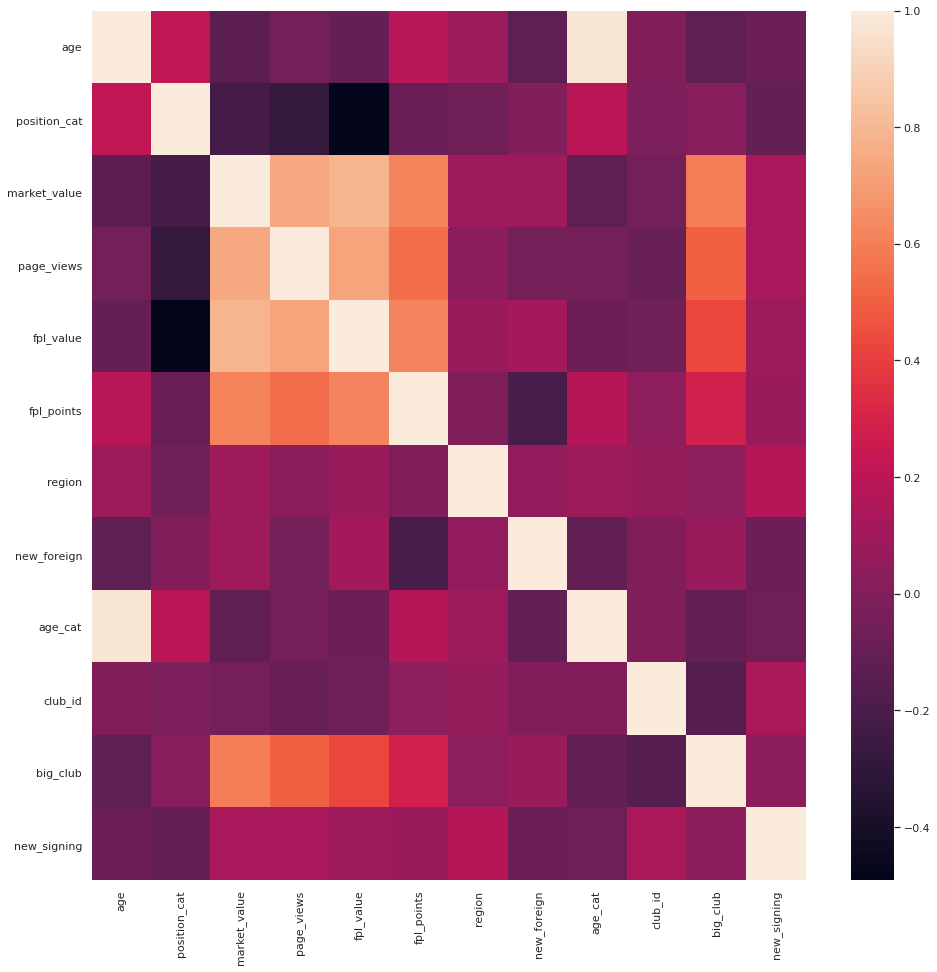

In [ ]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr())

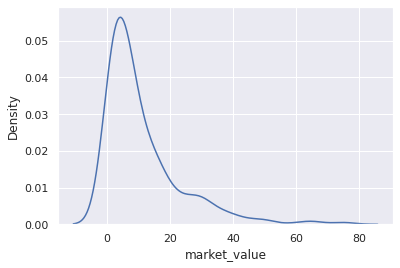

In [ ]:
sns.kdeplot(data=df, x="market_value")
#sns.histplot(data=df, x="market_value")

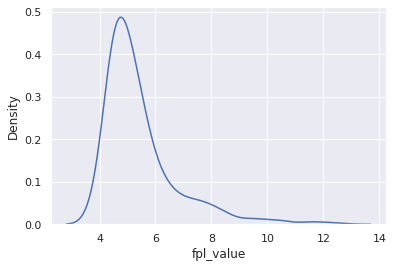

In [ ]:
sns.kdeplot(data=df, x="fpl_value")

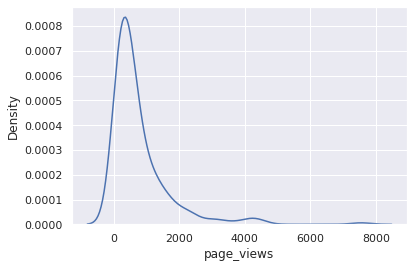

In [ ]:
sns.kdeplot(data=df, x="page_views")

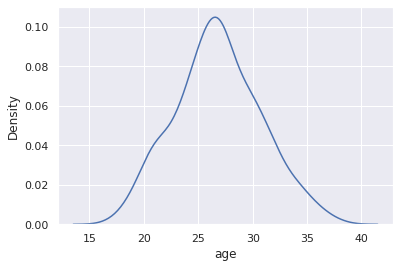

In [ ]:
sns.kdeplot(data=df, x="age")

In [ ]:
a = np.sqrt(df['market_value'])
a.skew()
#sns.kdeplot(data=df, x=a)

0.8786726131088701

In [ ]:
sns.pairplot(df, hue = 'region', height = 5)

TypeError: ignored

Error in callback <function flush_figures at 0x7f4350d932f0> (for post_execute):


KeyboardInterrupt: ignored

# Checking correlation of features with market value 

(All the plots that I have plotted are with numerical features. I have not done it yet with the categorical variables like nationalities)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


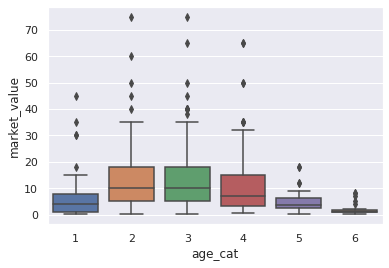

In [ ]:
# Relation between age category and market value 
sns.boxplot(df['age_cat'], df['market_value']) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


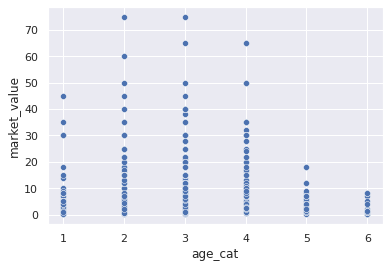

In [ ]:
sns.scatterplot(df['age_cat'], df['market_value'])
# It's like gaussian distribution. Players falling between age category 2-4 are much more in demand in comparison to 1,5 and 6

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


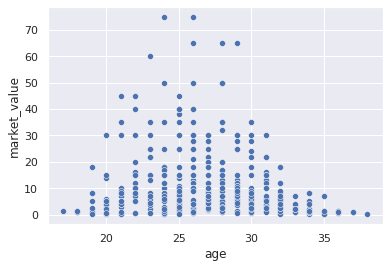

In [ ]:
# Relation between age and market value 
sns.scatterplot(df['age'], df['market_value'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


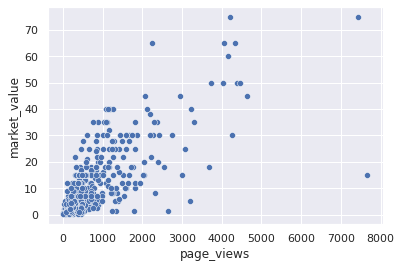

In [ ]:
# Relation between page_views and market value 
sns.scatterplot(df['page_views'], df['market_value'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


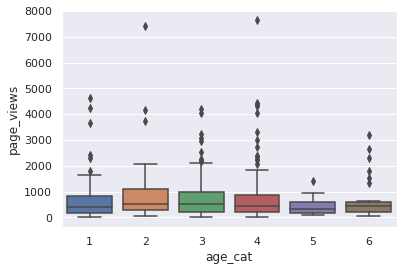

In [ ]:
sns.boxplot(df['age_cat'], df['page_views'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


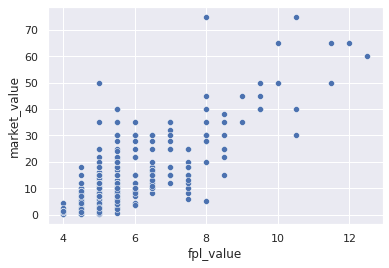

In [ ]:
# Relation between fpl_value and market value 
sns.scatterplot(df['fpl_value'], df['market_value'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


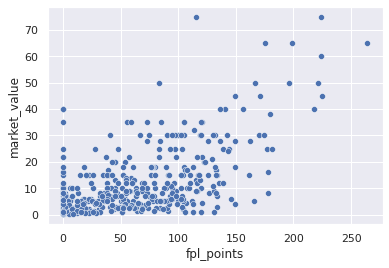

In [ ]:
# Relation between fpl_points and market value 
sns.scatterplot(df['fpl_points'], df['market_value'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


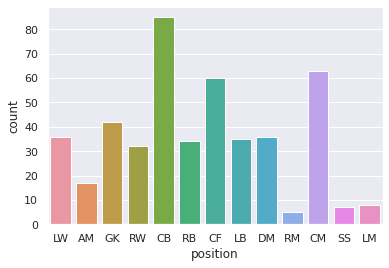

In [ ]:
sns.countplot(df['position'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


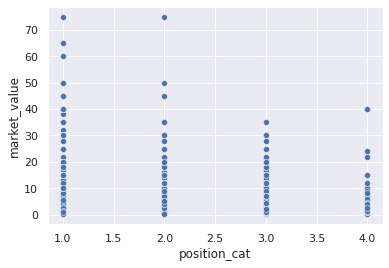

In [ ]:
sns.scatterplot(df['position_cat'], df['market_value'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


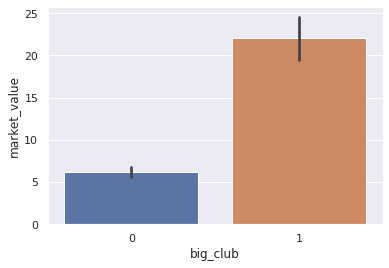

In [ ]:
# Relation between age and market value
# 0 : club is not big
# 1 : club is big 
sns.barplot(df['big_club'], df['market_value'])

Age, Age category, FPL values, FPL points, page views and big club are highly correlated with market value of the football player. Age and Age category are negatively correlated whereas the other features show positive correlation

# Checking correlation among the features

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


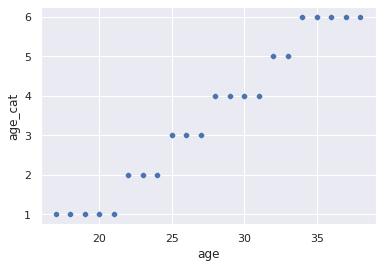

In [ ]:
sns.scatterplot(df['age'], df['age_cat'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


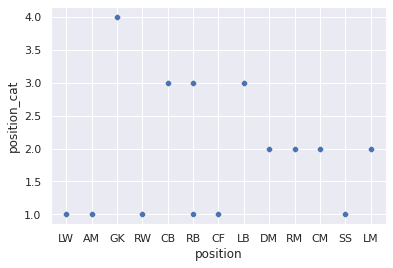

In [ ]:
sns.scatterplot(df['position'], df['position_cat'])

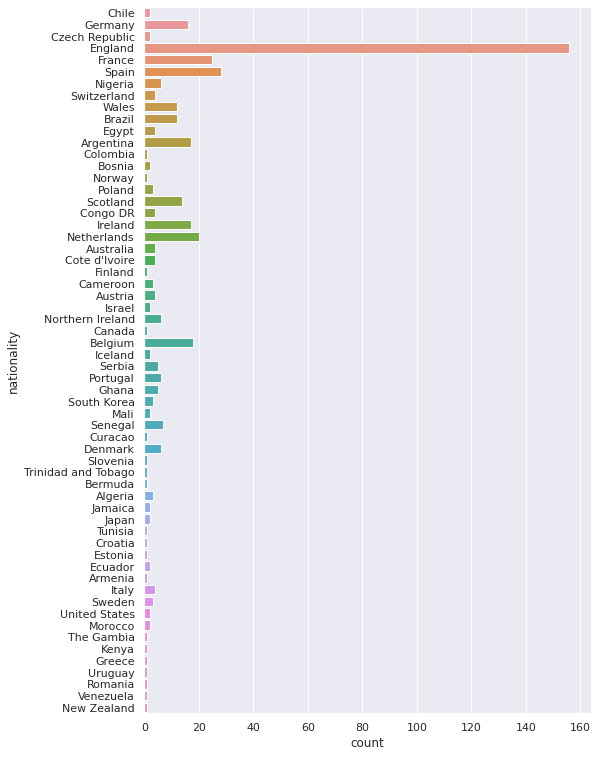

In [ ]:
sns.set(rc={'figure.figsize':(8,13)})
sns.countplot(y=df['nationality'])

In [ ]:
df['nationality'].value_counts()


England                156
Spain                   28
France                  25
Netherlands             20
Belgium                 18
Ireland                 17
Argentina               17
Germany                 16
Scotland                14
Wales                   12
Brazil                  12
Senegal                  7
Portugal                 6
Northern Ireland         6
Denmark                  6
Nigeria                  6
Ghana                    5
Serbia                   5
Congo DR                 4
Australia                4
Egypt                    4
Switzerland              4
Austria                  4
Italy                    4
Cote d'Ivoire            4
Sweden                   3
Poland                   3
Cameroon                 3
South Korea              3
Algeria                  3
Czech Republic           2
Iceland                  2
Chile                    2
Mali                     2
Bosnia                   2
United States            2
Ecuador                  2
M

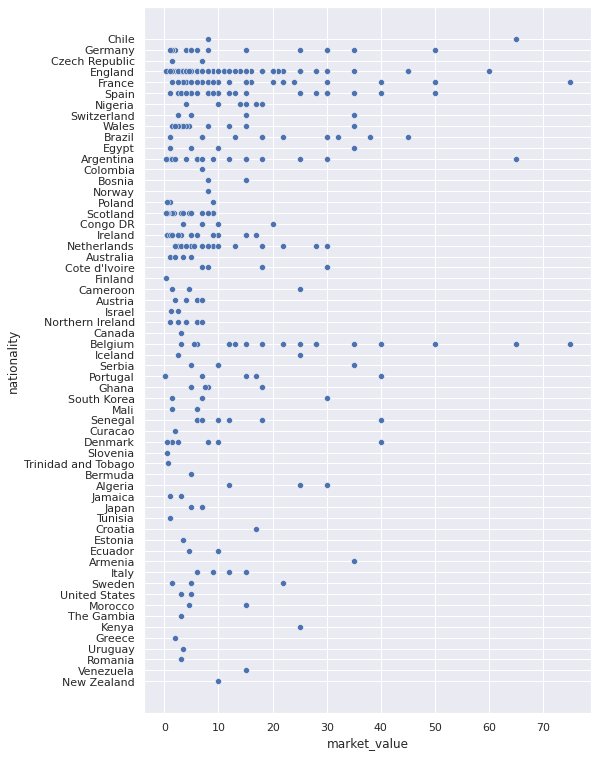

In [ ]:
sns.set(rc={'figure.figsize':(8,13)})
sns.scatterplot(y=df['nationality'],x=df['market_value'])

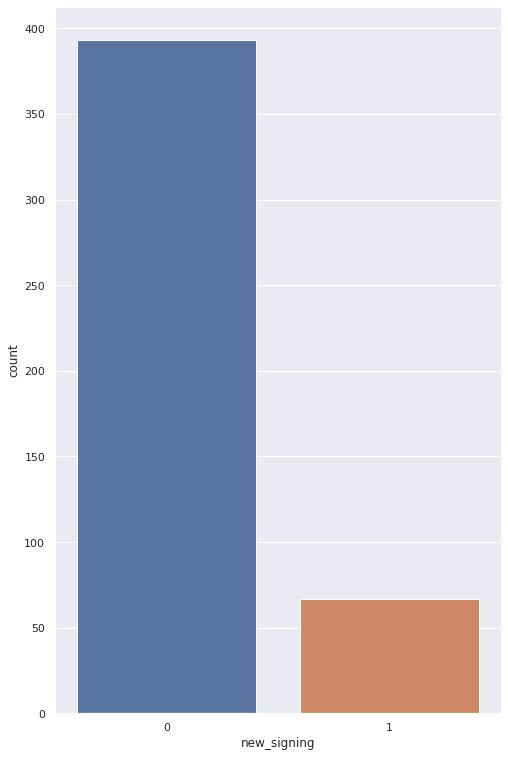

In [ ]:
sns.countplot(x = df['new_signing'])

In [ ]:
df['new_signing'].value_counts()

0    393
1     67
Name: new_signing, dtype: int64

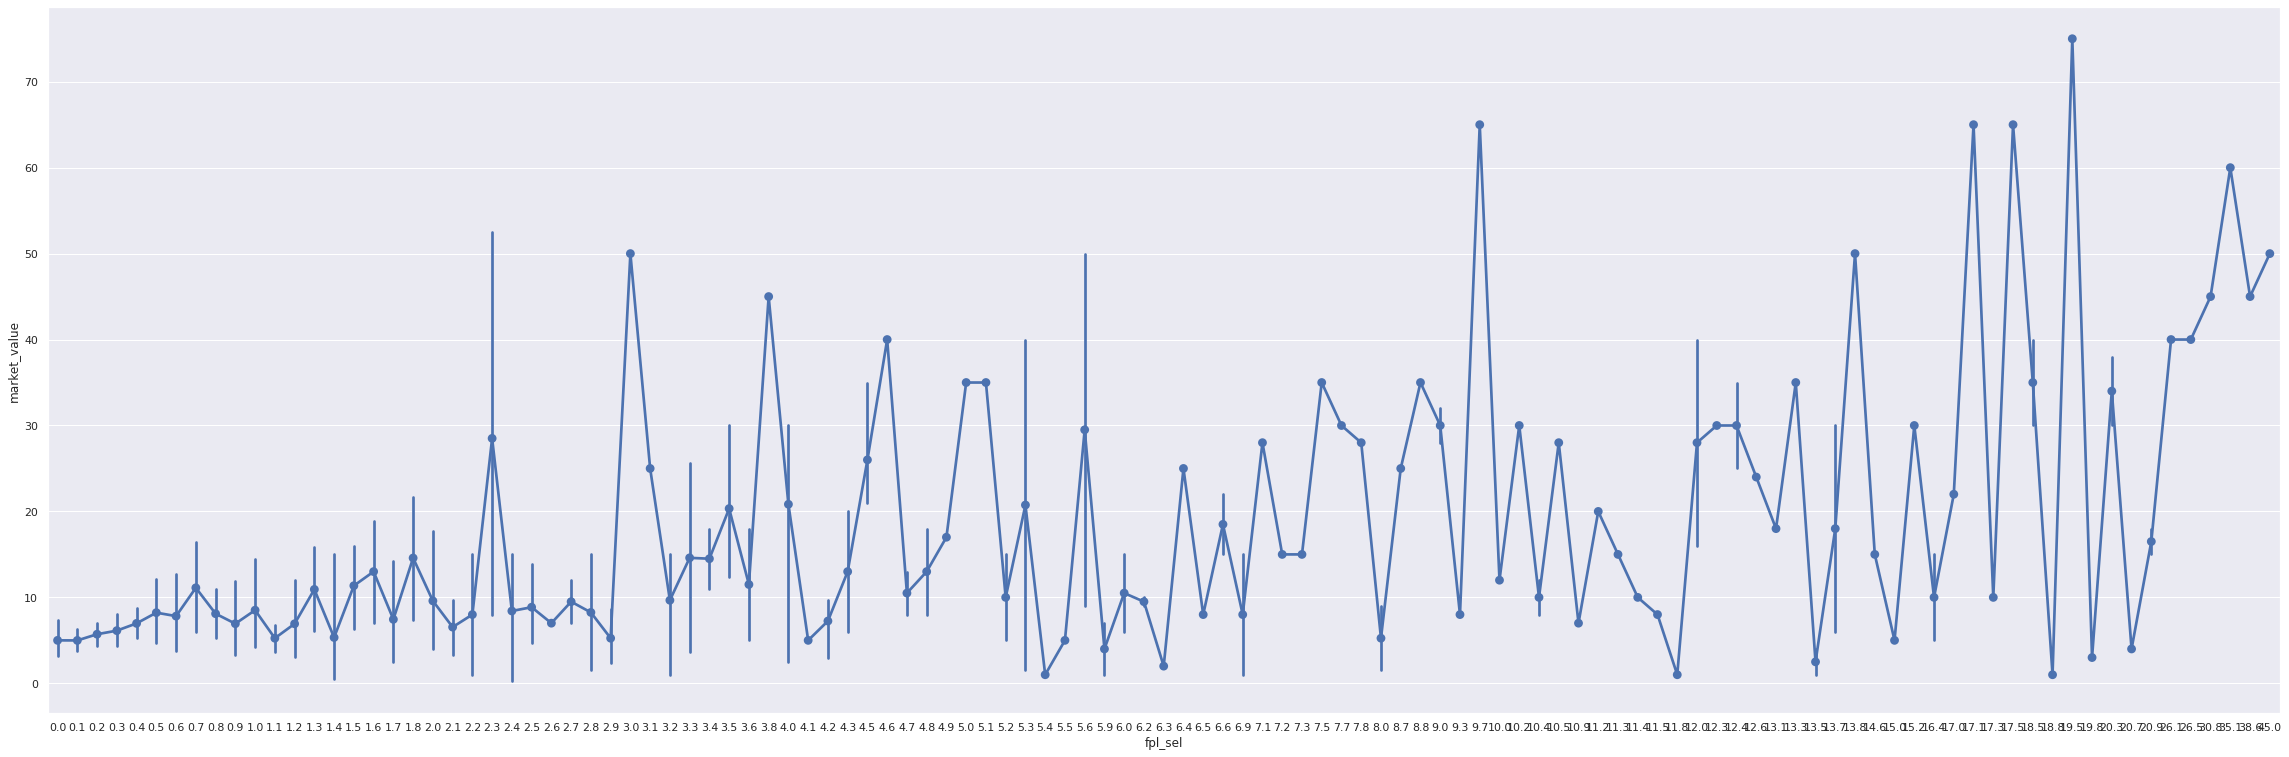

In [ ]:
sns.set(rc={'figure.figsize':(40,13)})
sns.pointplot(x = df['fpl_sel'], y = df['market_value'])

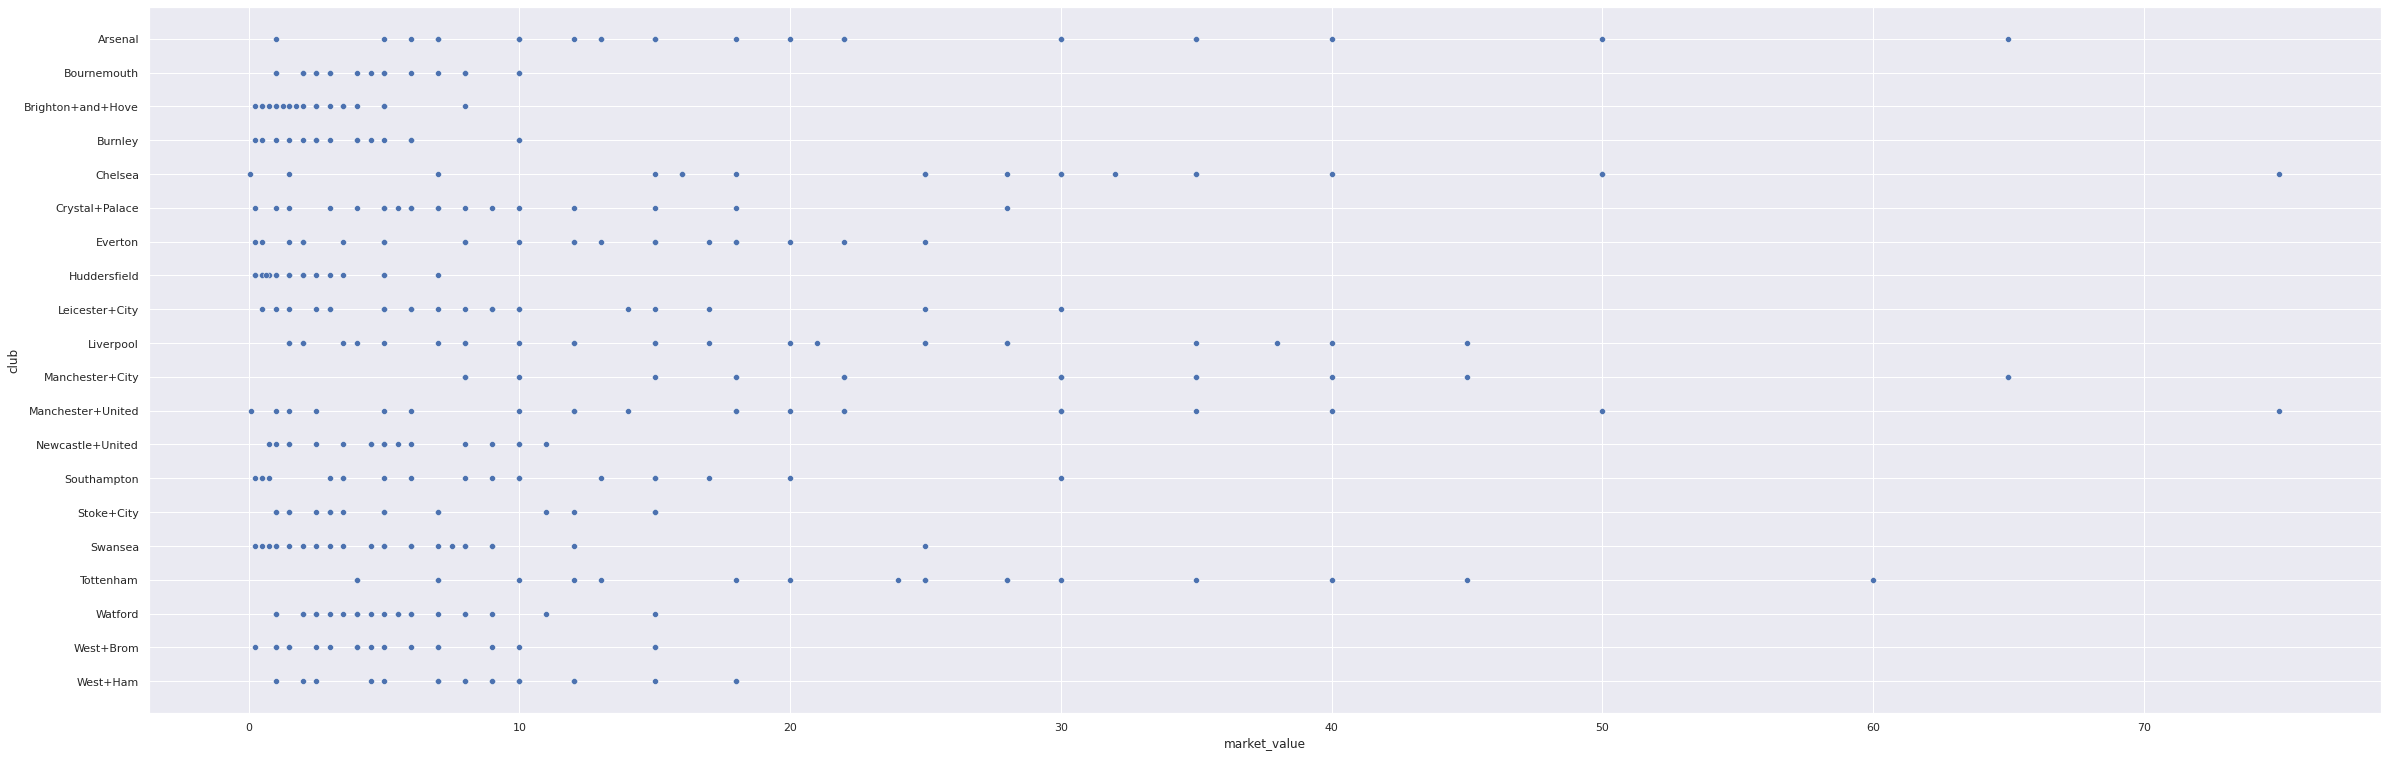

In [ ]:
sns.scatterplot(y= df["club"], x = df["market_value"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(19.0, 36.0)

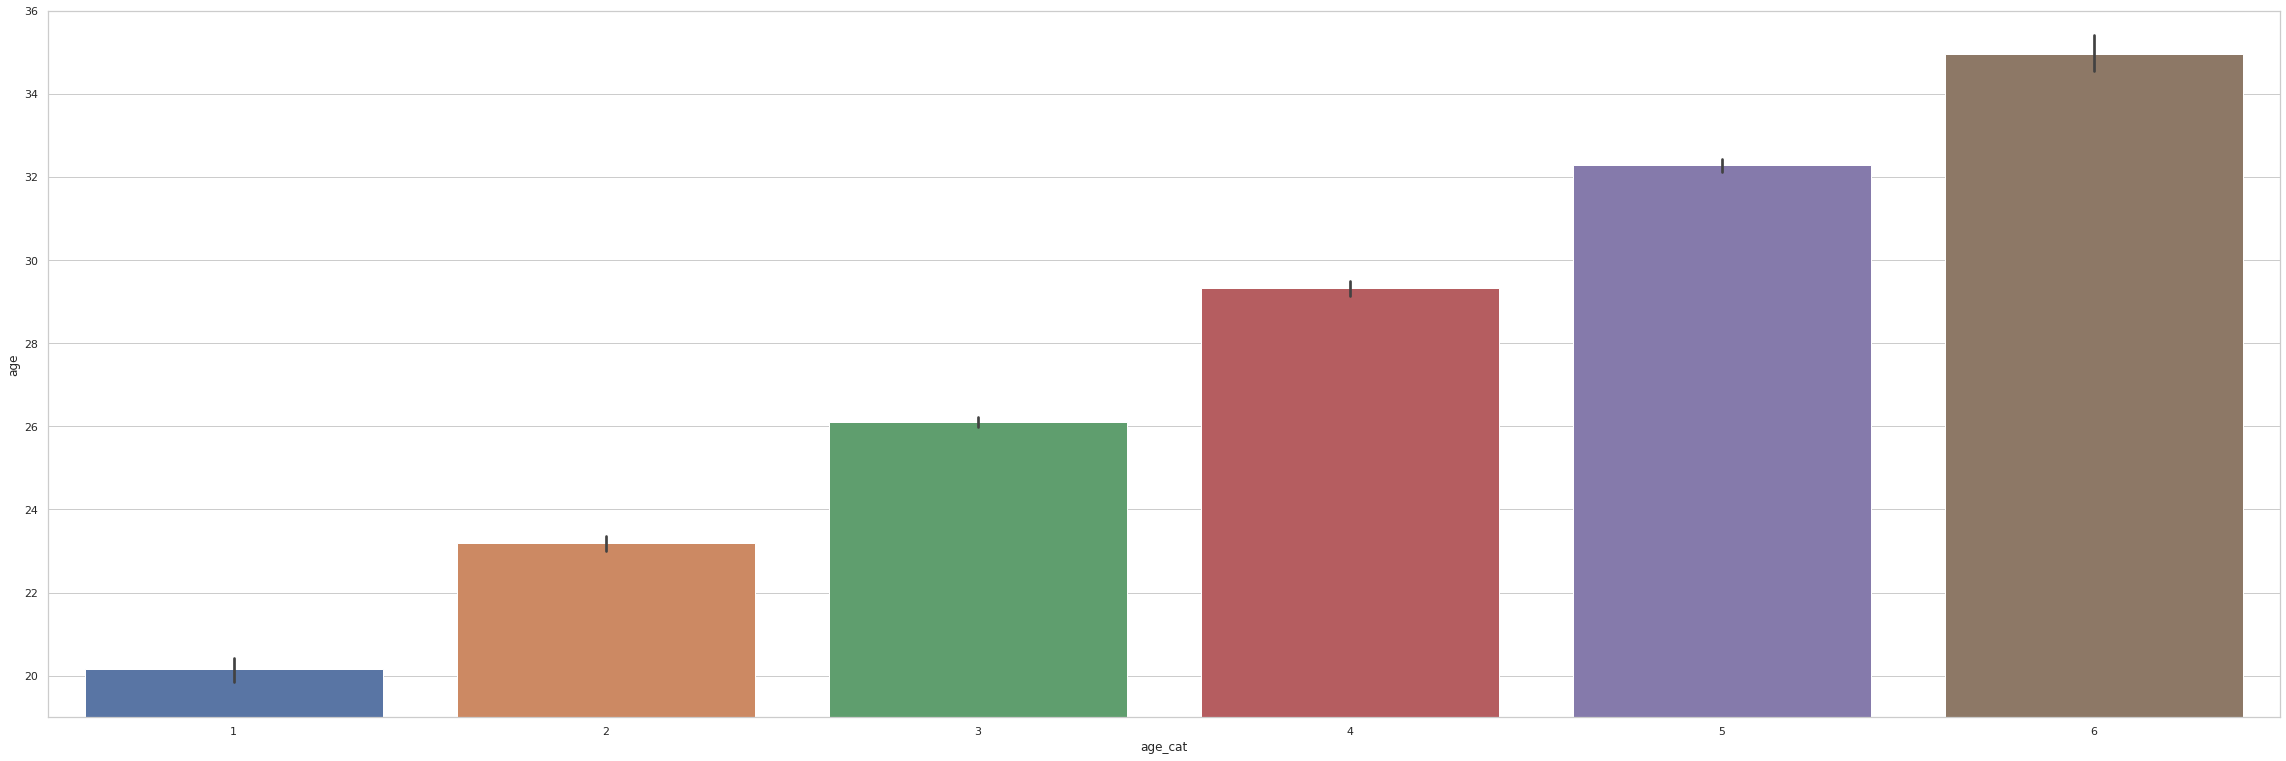

In [ ]:
sns.set(style="whitegrid")
g=sns.barplot(df['age_cat'],df['age'])
g.set_ylim(19 , 36)
# This plot shows what age group is there in particular age_cat

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


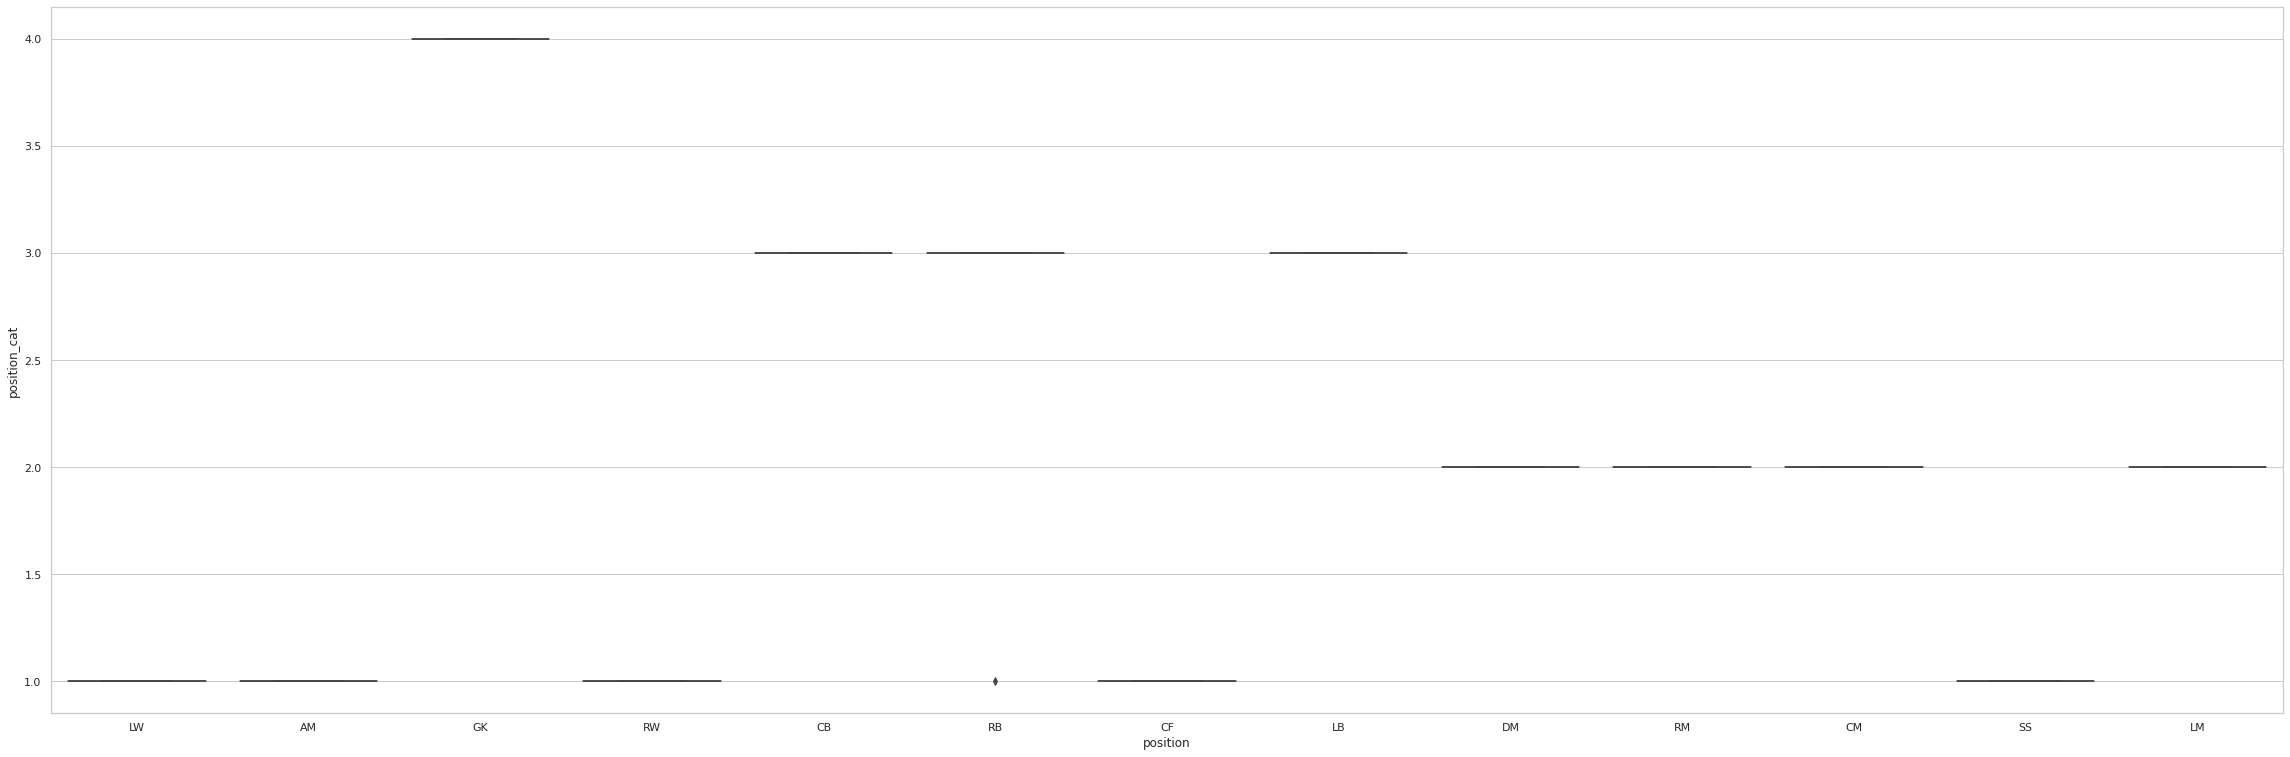

In [ ]:
sns.boxplot(df['position'], df['position_cat'])
#This shows which position belongs to which category

In [ ]:

df['club'].value_counts()

Everton              28
Arsenal              28
Liverpool            27
Huddersfield         27
Swansea              25
Manchester+United    25
Leicester+City       24
Bournemouth          24
Watford              24
Southampton          23
Brighton+and+Hove    22
West+Ham             22
Stoke+City           22
Crystal+Palace       21
Newcastle+United     21
Tottenham            20
Manchester+City      20
Chelsea              20
West+Brom            19
Burnley              18
Name: club, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


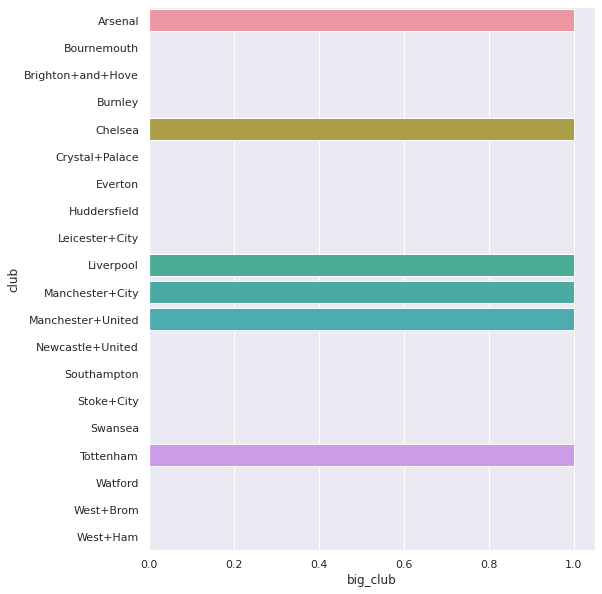

In [ ]:
sns.set(rc={'figure.figsize':(8,10)})
sns.barplot(df['big_club'],df['club'])
#This graph shows which club is a big Club

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


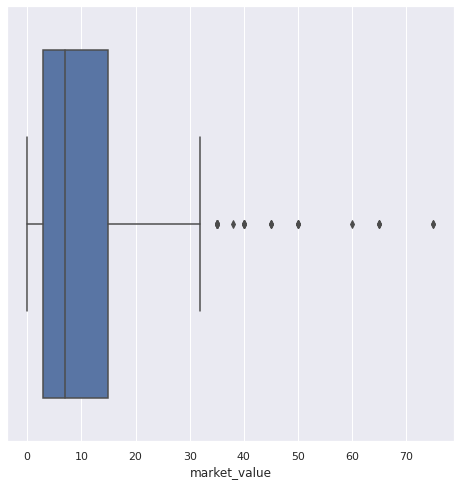

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
sns.boxplot(df['market_value'])
#the graph shows that data consist of outliers of high value, this can result to biased output for some

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


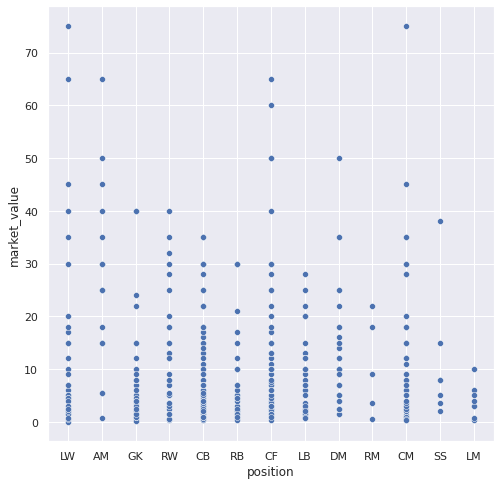

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
sns.scatterplot(df['position'],df['market_value'])

In [ ]:
df['position'].value_counts()

CB    85
CM    63
CF    60
GK    42
DM    36
LW    36
LB    35
RB    34
RW    32
AM    17
LM     8
SS     7
RM     5
Name: position, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


'\n1 for England\n2 for EU\n3 for Americas\n4 for Rest of World\n'

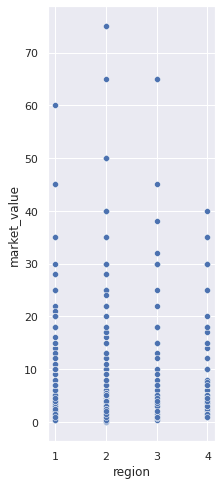

In [ ]:
sns.set(rc={'figure.figsize':(3,8)})
sns.scatterplot(df['region'],df['market_value'])
'''
1 for England
2 for EU
3 for Americas
4 for Rest of World
'''

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


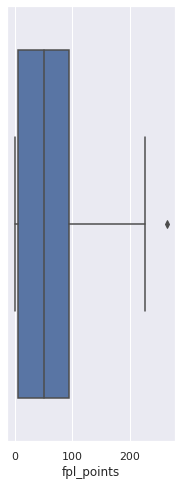

In [ ]:
sns.boxplot(df['fpl_points'])

In [ ]:
df['new_foreign'].value_counts()


0    444
1     16
Name: new_foreign, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


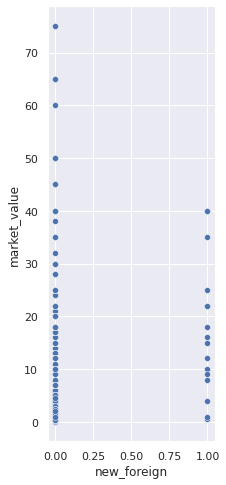

In [ ]:
sns.scatterplot(df['new_foreign'],df['market_value'])

# Gradient Boosted Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, median_absolute_error, explained_variance_score

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
y = df['market_value'].iloc[:].values
df.drop(columns=['market_value','name','club', 'position', 'nationality', 'fpl_sel'], inplace=True)
X = df.iloc[:,:].values

In [ ]:
y.shape

(460,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

In [ ]:
params = {'n_estimators': 800,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [ ]:
pca = PCA(n_components='mle')

In [ ]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_ratio_)

[9.97684412e-01 2.25762732e-03 3.63179675e-05 1.84512591e-05
 1.35275625e-06 1.01540169e-06 4.22396338e-07 1.49783564e-07
 1.31726235e-07 9.01610819e-08]


In [ ]:
components = pca.transform(X_train)
filtered = pca.inverse_transform(components)

In [ ]:
pca.n_components_

10

In [ ]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=800,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt

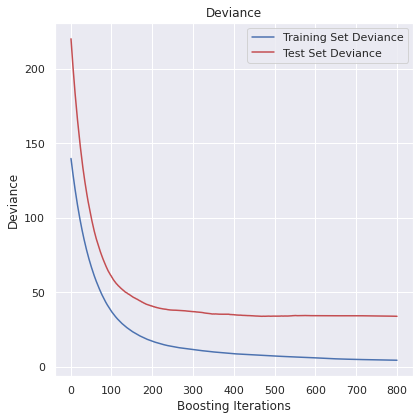

In [ ]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [ ]:
reg.feature_importances_

array([0.06303711, 0.00838559, 0.22753962, 0.52217859, 0.07734623,
       0.00529435, 0.00293971, 0.01664061, 0.01757395, 0.05614997,
       0.00291427])

#Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

reg_d = DecisionTreeRegressor(max_depth=2)
reg_d.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
X.shape

(460, 11)

In [ ]:
y_pred = reg_d.predict(X_test)

In [ ]:
reg_d.score(X_test, y_test)

0.6230929020196282

In [ ]:
mse = mean_squared_error(y_test, reg.predict(X_test))

In [ ]:
mse

33.899089393951535

In [ ]:
reg.score(X_test, y_test)

0.8389875719391703

In [ ]:
r2_score(y_test, y_pred)

0.6230929020196282

In [ ]:
median_absolute_error(y_test, y_pred)

5.26875

In [ ]:
explained_variance_score(y_test, y_pred)

0.6353170526095471

## **Nearest Neighbour Regression**

In [210]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split 

In [220]:
df = pd.read_csv("/content/data.csv")
df = df.dropna()
for i in tqdm(range(0,df.shape[0])):
  df['fpl_sel'].iloc[i] = float(str(df['fpl_sel'].iloc[i]).rstrip('%'))

  0%|          | 0/460 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
100%|██████████| 460/460 [00:00<00:00, 5449.53it/s]


In [214]:
df.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
market_value    float64
page_views        int64
fpl_value       float64
fpl_sel          object
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
dtype: object

In [238]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df['club']= label_encoder.fit_transform(df['club'])
df['position']= label_encoder.fit_transform(df['position'])
df['nationality']= label_encoder.fit_transform(df['nationality'])
##df.drop(['name'],axis=1, inplace=True)


X_train = df.to_numpy()
y_train = df['market_value'].to_numpy()

X_test = df.to_numpy()

knn = KNeighborsRegressor(n_neighbors=7) 
  
knn.fit(X_train, y_train) 

print(knn.predict(X_test))

[56.42857143 53.57142857 18.85714286 25.14285714 22.14285714 20.42857143
 32.57142857 10.28571429 17.92857143 18.78571429 18.78571429 17.28571429
 19.21428571 23.57142857  8.57142857  8.64285714  6.71428571 14.42857143
 17.28571429  8.5         6.5        25.28571429  4.28571429  6.07142857
  6.07142857  7.71428571  7.         20.35714286 21.14285714 26.14285714
  4.14285714  6.21428571  4.          5.57142857  5.5         9.
  4.28571429  5.64285714  8.21428571  2.35714286  6.14285714 15.85714286
  2.57142857  2.64285714  7.57142857  5.5         2.57142857  2.5
  7.78571429  9.87142857  7.57142857  7.71428571  1.46428571  6.35714286
  2.42857143  4.17857143  0.92857143  1.64285714  1.21428571  2.35714286
  0.78571429  1.28571429  8.71428571  1.85714286  1.46428571  5.86428571
  2.21428571  0.92857143  1.75        2.92857143  1.14285714  4.50714286
  4.82142857  2.67857143 12.14285714  7.42857143 11.92857143  4.28571429
  4.14285714  4.21428571  4.92857143  5.85714286  5.28571429  7.57

In [237]:
print(knn.score(X_test, y_train)) 

0.7290026526038453


In [239]:
np.any(np.isnan(X_train))

TypeError: ignored

In [240]:
np.all(np.isfinite(X_train))

TypeError: ignored

# Linear, Lasso and Ridge Regression



In [243]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm as tqdm
import numpy as np
from sklearn.decomposition import PCA
from sklearn import linear_model
import sklearn
from sklearn.metrics import mean_squared_error

In [244]:
data = pd.read_csv("data.csv")
data = data.dropna()
data = data.drop(['position','name','age','club','nationality'], axis = 1)
for i in range(0,data.shape[0]):
    data['fpl_sel'].iloc[i] = float(str(data['fpl_sel'].iloc[i]).rstrip('%'))
data['fpl_sel'] = data['fpl_sel'].astype('float64')

# outliers removal
# print(data['page_views'].quantile(0.90))
# data["page_views"] = np.where(data["page_views"] >1713.4, 1713.4,data['page_views'])
# print(data['fpl_sel'].quantile(0.90))
# data["fpl_sel"] = np.where(data["fpl_sel"] >10.4, 10.4,data['fpl_sel'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [245]:
#splitting the data
X = data[data.columns[~data.columns.isin(['market_value'])]]
y = data['market_value']

from sklearn.model_selection import train_test_split
np.random.seed(37) # Set seed
x_train, x_test = train_test_split(X, test_size = 0.15, random_state = 40 )

## dont using iloc as we have projected from data
y_train = y.loc[x_train.index.values] 
y_test = y.loc[x_test.index.values]
x_train = X.loc[x_train.index.values, :]
x_test = X.loc[x_test.index.values, :]

In [246]:
concat_train_data = pd.concat([x_train,y_train],axis=1)

#scaling
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_data = scaler.fit_transform(x_train)
#print(scaler.transform(concat_train_data))
scaled_data.shape

(391, 11)

In [247]:
pca = PCA(n_components=11)
pca.fit(scaled_data)
print(pca.explained_variance_)
print(np.cumsum(pca.explained_variance_ratio_*100))

#taking all the components which explains 100% varience

[3.13518941 1.42908526 1.32032697 1.07965441 0.97622187 0.92121488
 0.69508833 0.63607002 0.39216154 0.29188226 0.15131017]
[ 28.42882752  41.38728487  53.35955923  63.14949695  72.00154363
  80.3548057   86.65762941  92.42529528  95.98128231  98.627971
 100.        ]


In [248]:
pca = PCA(n_components=11)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [249]:
X = pca.transform(scaled_data)
y = y_train

#linear_Model

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

In [250]:
#scaling and pca on the test data
scaled_data_test = scaler.fit_transform(x_test)
test_data = pca.transform(scaled_data_test)
pred = reg.predict(test_data)
mean_squared_error(y_test,pred)

28.359678263552688

In [251]:
#R2 value on test data
sklearn.metrics.r2_score(y_test, pred, sample_weight=None, multioutput='uniform_average')

0.8102008920434556

In [252]:
# MSE of test data
mean_squared_error(y_test,pred)

28.359678263552688

In [253]:
#ridge model
from sklearn import linear_model

clf = linear_model.Ridge(alpha=0.1,max_iter=800,tol = 0.000001)
clf.fit(X,y)
from sklearn.metrics import mean_squared_error
pred_lasso = clf.predict(test_data)
mean_squared_error(y_test,pred_lasso)

28.362137480929135

In [254]:
sklearn.metrics.r2_score(y_test, pred_lasso, sample_weight=None, multioutput='uniform_average')

0.8101844335610996

In [255]:
#lasso model
from sklearn import linear_model

clf = linear_model.Lasso(alpha=0.1,max_iter=800,tol = 0.000001)
clf.fit(X,y)
from sklearn.metrics import mean_squared_error
pred_lasso = clf.predict(test_data)
mean_squared_error(y_test,pred_lasso)

28.69732463047874

In [256]:
clf.n_iter_

2

In [257]:
import sklearn
sklearn.metrics.r2_score(y_test, pred_lasso, sample_weight=None, multioutput='uniform_average')

0.807941170383295

#Genetic Algo

In [258]:

  
from random import random, sample, choice
from math import floor
from tqdm import tqdm
from numpy import array, dot, mean
from numpy.linalg import pinv
from sys import exit


def generate_data():
    """
    We will generate data with a clear pattern.
    This ensures we have an idea of the desired result.
    This is only for demonstration purposes, real data is needed in practice.
    """
    coeff = [0.4, -0.3, 0.2, -0.1]
    x = [[random() for j in range(len(coeff))] for i in range(1000)]
    y = [dot(i, coeff) for i in x]
    return array(x), array(y)


def multiple_linear_regression(inputs, outputs):
    """
    Get the best expected outcome.
    This is expected to equal the coefficients in generate_data().
    """
    X, Y = array(inputs), array(outputs)
    X_t, Y_t = X.transpose(), Y.transpose()
    coeff = dot((pinv((dot(X_t, X)))), (dot(X_t, Y)))
    Y_p = dot(X, coeff)
    Y_mean = mean(Y)
    SST = array([(i - Y_mean) ** 2 for i in Y]).sum()
    SSR = array([(i - j) ** 2 for i, j in zip(Y, Y_p)]).sum()
    COD = (1 - (SSR / SST)) * 100.0
    av_error = (SSR / len(Y))
    return {'COD': COD, 'coeff': coeff, 'error': av_error}


def check_termination_condition(best_individual):
    """
    Check if the current_best_individual is better of equal to the expected.
    """
    if ((best_individual['COD'] >= 99.0)
            or (generation_count == max_generations)):
        return True
    else:
        return False


def create_individual(individual_size):
    """
    Create an individual.
    """
    return [random() for i in range(individual_size)]


def create_population(individual_size, population_size):
    """
    Create an initial population.
    """
    return [create_individual(individual_size) for i in range(population_size)]


def get_fitness(individual, inputs):
    """
    Calculate the fitness of an individual.
    Return the Coefficient of Determination, average error and weight.
    We use the error to get the best individual.
    """
    predicted_outputs = dot(array(inputs), array(individual))
    output_mean = mean(outputs)
    SST = array(
        [(i - output_mean) ** 2 for i in outputs]).sum()
    SSR = array(
        [(i - j) ** 2 for i, j in zip(outputs, predicted_outputs)]).sum()
    COD = (1 - (SSR / SST)) * 100.0
    av_error = (SSR / len(outputs))
    return {'COD': COD, 'error': av_error, 'coeff': individual}


def evaluate_population(population):
    """
    Evaluate a population of individuals and return the best among them.
    """
    fitness_list = [get_fitness(individual, inputs)
                    for individual in tqdm(population)]
    error_list = sorted(fitness_list, key=lambda i: i['error'])
    best_individuals = error_list[: selection_size]
    best_individuals_stash.append(best_individuals[0]['coeff'])
    print('Error: ', best_individuals[0]['error'],
          'COD: ', best_individuals[0]['COD'])
    return best_individuals


def crossover(parent_1, parent_2):
    """
    Return offspring given two parents.
    Unlike real scenarios, genes in the chromosomes aren't necessarily linked.
    """
    child = {}
    loci = [i for i in range(0, individual_size)]
    loci_1 = sample(loci, floor(0.5*(individual_size)))
    loci_2 = [i for i in loci if i not in loci_1]
    chromosome_1 = [[i, parent_1['coeff'][i]] for i in loci_1]
    chromosome_2 = [[i, parent_2['coeff'][i]] for i in loci_2]
    child.update({key: value for (key, value) in chromosome_1})
    child.update({key: value for (key, value) in chromosome_2})
    return [child[i] for i in loci]


def mutate(individual):
    """
    Mutate an individual.
    The gene transform decides whether we'll add or deduct a random value.
    """
    loci = [i for i in range(0, individual_size)]
    no_of_genes_mutated = floor(probability_of_gene_mutating*individual_size)
    loci_to_mutate = sample(loci, no_of_genes_mutated)
    for locus in loci_to_mutate:
        gene_transform = choice([-1, 1])
        change = gene_transform*random()
        individual[locus] = individual[locus] + change
    return individual


def get_new_generation(selected_individuals):
    """
    Given selected individuals, create a new population by mating them.
    Here we also apply variation operations like mutation and crossover.
    """
    parent_pairs = [sample(selected_individuals, 2)
                    for i in range(population_size)]
    offspring = [crossover(pair[0], pair[1]) for pair in parent_pairs]
    offspring_indices = [i for i in range(population_size)]
    offspring_to_mutate = sample(
        offspring_indices,
        floor(probability_of_individual_mutating*population_size)
    )
    mutated_offspring = [[i, mutate(offspring[i])]
                         for i in offspring_to_mutate]
    for child in mutated_offspring:
        offspring[child[0]] = child[1]
    return offspring

inputs, outputs = generate_data()
individual_size = len(inputs[0])
population_size = 1000
selection_size = floor(0.1*population_size)
max_generations = 50
probability_of_individual_mutating = 0.1
probability_of_gene_mutating = 0.25
#best_possible = multiple_linear_regression(inputs, outputs)
best_individuals_stash = [create_individual(individual_size)]
initial_population = create_population(individual_size, 1000)
current_population = initial_population
termination = False
generation_count = 0
while termination is False:
    current_best_individual = get_fitness(best_individuals_stash[-1], inputs)
    print('Generation: ', generation_count)
    best_individuals = evaluate_population(current_population)
    current_population = get_new_generation(best_individuals)
    termination = check_termination_condition(current_best_individual)
    generation_count += 1
else:
    print(get_fitness(best_individuals_stash[-1], inputs))



  8%|▊         | 76/1000 [00:00<00:01, 753.36it/s]

Generation:  0


  7%|▋         | 67/1000 [00:00<00:01, 667.85it/s]

Error:  0.02470672843026138 COD:  -1.854188083687358
Generation:  1


  8%|▊         | 75/1000 [00:00<00:01, 747.74it/s]

Error:  0.006323258302131532 COD:  73.93218846335824
Generation:  2


  8%|▊         | 76/1000 [00:00<00:01, 754.60it/s]

Error:  0.0015508801208416849 COD:  93.60645275357528
Generation:  3


  8%|▊         | 77/1000 [00:00<00:01, 762.73it/s]

Error:  0.002635480791550655 COD:  89.13515575357357
Generation:  4


 15%|█▍        | 146/1000 [00:00<00:01, 729.75it/s]

Error:  0.0013005095815738295 COD:  94.63861239661277
Generation:  5


  6%|▋         | 64/1000 [00:00<00:01, 638.15it/s]

Error:  0.0009740675836765621 COD:  95.98437878353424
Generation:  6


 14%|█▍        | 138/1000 [00:00<00:01, 687.79it/s]

Error:  0.0006836167969475715 COD:  97.18177038250914
Generation:  7


 14%|█▍        | 140/1000 [00:00<00:01, 687.79it/s]

Error:  0.0002476559254045493 COD:  98.97903142953972
Generation:  8


  8%|▊         | 76/1000 [00:00<00:01, 759.34it/s]

Error:  2.991322170596164e-05 COD:  99.8766818958476
Generation:  9


100%|██████████| 1000/1000 [00:01<00:00, 733.92it/s]

Error:  2.991322170596164e-05 COD:  99.8766818958476
{'COD': 99.8766818958476, 'error': 2.991322170596164e-05, 'coeff': [0.39178499183146587, -0.29598559526072776, 0.21360707021514236, -0.10734239369635379]}


#Random Forest

In [260]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm as tqdm
import numpy as np

In [269]:
data = pd.read_csv("data.csv")
data = data.dropna()
for i in range(0,data.shape[0]):
    data['fpl_sel'].iloc[i] = float(str(data['fpl_sel'].iloc[i]).rstrip('%'))
data['fpl_sel'] = data['fpl_sel'].astype('float64')
#print(data.dtypes)
#data.head

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [270]:
# print(data['page_views'].quantile(0.90))
# data["page_views"] = np.where(data["page_views"] <1713.4, 1713.4,data['page_views'])
# print(data['fpl_sel'].quantile(0.90))
# data["fpl_sel"] = np.where(data["fpl_sel"] <10.4, 10.4,data['fpl_sel'])

In [271]:
X = data[data.columns[~data.columns.isin(['market_value'])]]
y = data['market_value']

from sklearn.model_selection import train_test_split
np.random.seed(37) # Set seed
x_train, x_test = train_test_split(X, test_size = 0.15, random_state = 40 )

## dont using iloc as we have projected from data
y_train = y.loc[x_train.index.values] 
y_test = y.loc[x_test.index.values]
x_train = X.loc[x_train.index.values, :]
x_test = X.loc[x_test.index.values, :]

In [272]:
x_train = x_train.dropna()
x_train = x_train.drop(['position','name','age','club','nationality'], axis = 1)
# #scaling
# from sklearn.preprocessing import StandardScaler
# scaler =StandardScaler()
# scaled_data = scaler.fit_transform(x_train)
# #print(scaler.transform(concat_train_data))
# scaled_data.shape

In [273]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=11)
# pca.fit(scaled_data)
# print(pca.explained_variance_)
# print(np.cumsum(pca.explained_variance_ratio_*100))


In [274]:
# pca = PCA(n_components=8)
# pca.fit(scaled_data)

X = x_train
y = y_train

In [275]:
#### Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

# create regressor object 
regressor = RandomForestRegressor(n_estimators = 90, random_state = 0) 

# fit the regressor with x and y data 
regressor.fit(X, y) 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [276]:
#x_test = x_test.drop(['position','name','age','club','nationality'], axis = 1)
# scaled_data_test = scaler.fit_transform(x_test)
# test_data = pca.transform(scaled_data_test)
Y_pred = regressor.predict(x_test) # test the output by changing values 
Y_pred

ValueError: ignored

In [277]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,Y_pred)

NameError: ignored

In [278]:
import sklearn
sklearn.metrics.r2_score(y_test, Y_pred, sample_weight=None, multioutput='uniform_average')

NameError: ignored

#Support Vector Regressor

In [279]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm as tqdm
import numpy as np

In [280]:
data = pd.read_csv("data.csv")
data = data.dropna()
for i in range(0,data.shape[0]):
    data['fpl_sel'].iloc[i] = float(str(data['fpl_sel'].iloc[i]).rstrip('%'))
data['fpl_sel'] = data['fpl_sel'].astype('float64')
#print(data.dtypes)
#data.head

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [281]:
import numpy as np
X = data[data.columns[~data.columns.isin(['market_value'])]]
y = data['market_value']

from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split(X,y, test_size = 0.15, random_state = 40 )

In [282]:
concat_train_data = pd.concat([x_train,y_train],axis=1)
x_train = x_train.dropna()
x_train = x_train.drop(['position','name','age','club','nationality'], axis = 1)
#scaling
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_data = scaler.fit_transform(x_train)
# #print(scaler.transform(concat_train_data))
# scaled_data.shape

In [283]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pca.fit(scaled_data)

# print(pca.explained_variance_)
# print(np.cumsum(pca.explained_variance_ratio_*100))

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [284]:
X = pca.transform(scaled_data)
# X = x_train
y = y_train

In [285]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1,5,6,7,8,9, 10 , 100 , 1000],'max_iter':[10 , 100 , 200 , 500 , 700 ,1000],'epsilon':[0.01,0.001,0.0001,0.00001,0.000001]}
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 5, 6, 7, 8, 9, 10, 100, 1000],
                         'epsilon': [0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ('linear', 'rbf'),
                         'max_iter': [10, 100, 200, 500, 700, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [286]:
print(clf.best_score_)
print(clf.best_params_)

0.7229125316789193
{'C': 5, 'epsilon': 1e-06, 'kernel': 'linear', 'max_iter': 700}


In [287]:
# model = SVR(kernel='linear',max_iter= 1000,epsilon=0.00001,tol=1e-06)
# model = SVR(C= 8, epsilon= 0.0001, kernel='linear', max_iter= 1000)
model = SVR(C= 7, epsilon= 0.001, kernel='linear', max_iter= 1000)
model.fit(X , y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVR(C=7, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma='scale',
    kernel='linear', max_iter=1000, shrinking=True, tol=0.001, verbose=False)

In [288]:
x_test = x_test.drop(['position','name','age','club','nationality'], axis = 1)
scaled_data_test = scaler.transform(x_test)
test_data = pca.transform(scaled_data_test)
pred = model.predict(test_data)

In [289]:
import sklearn
sklearn.metrics.r2_score(y_test, pred, sample_weight=None, multioutput='uniform_average')

0.83055002422263

In [290]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)

25.31912213156062

In [291]:
mean_squared_error(y,model.predict(X))

37.49174920002532

In [292]:
import sklearn
sklearn.metrics.explained_variance_score(y_test, pred)

0.8356478215909461